## learning rate scheduler

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import warmup_scheduler
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
model = [nn.Parameter(torch.randn(2, 2, requires_grad = True))]

In [37]:
def plot_lr(optimizer, scheduler):
    lr_list = []
    for epoch in range(100):
        # 重みを更新する
        optimizer.step()
        # 学習率の更新チェック
        scheduler.step()
        
        # 学習率の保存
        for param_group in optimizer.param_groups:
            lr_list.append(param_group['lr'])
            
    # plot
    plt.plot(lr_list, label = "lr")
        
    plt.xlabel("epoch")
    plt.ylabel("lr_list")
    plt.show()

### cosine lr scheduler

とりあえず使っておく感じのスケジューラ

In [38]:
optimizer = optim.SGD(model, lr = 1e-3)
cos_scheduler =  lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

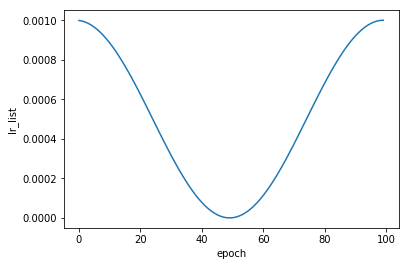

In [39]:
plot_lr(optimizer, cos_scheduler)

### Warmup lr scheduler

- ```multiplier``` : warmup後の学習率= optimizerに指定した学習率*multiplier
- ```total_epoch``` : 指定したepoch数までwarmupをする
- ```after_scheduler``` : warmup後に用いるscheduerを指定する

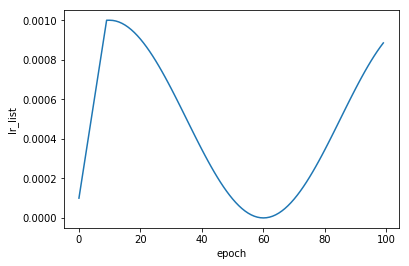

In [40]:
wp_scheduler = warmup_scheduler.GradualWarmupScheduler(optimizer,
                                                      multiplier=1., total_epoch=10, after_scheduler=cos_scheduler)
plot_lr(optimizer, wp_scheduler)